In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/aqx_p_432.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sitename     85 non-null     object 
 1   county       85 non-null     object 
 2   aqi          84 non-null     float64
 3   pollutant    4 non-null      object 
 4   status       84 non-null     object 
 5   so2          79 non-null     float64
 6   co           80 non-null     float64
 7   o3           80 non-null     float64
 8   o3_8hr       84 non-null     float64
 9   pm10         82 non-null     float64
 10  pm2.5        80 non-null     float64
 11  no2          80 non-null     float64
 12  nox          80 non-null     float64
 13  no           80 non-null     float64
 14  wind_speed   85 non-null     object 
 15  wind_direc   85 non-null     object 
 16  publishtime  85 non-null     object 
 17  co_8hr       84 non-null     float64
 18  pm2.5_avg    84 non-null     float64
 19  pm10_avg  

In [8]:
data.isnull().sum()

sitename       0
county         0
aqi            0
status         0
so2            0
co             0
o3             0
o3_8hr         0
pm10           0
pm2.5          0
no2            0
nox            0
no             0
wind_speed     0
wind_direc     0
publishtime    0
co_8hr         0
pm2.5_avg      0
pm10_avg       0
so2_avg        0
longitude      0
latitude       0
siteid         0
dtype: int64

In [7]:
#處理缺失值
#pollutant缺失太多，所以刪除整列
data = data.drop(['pollutant'],axis=1)
#status只有缺失一個值，所以補上最常出現的
data['status'] = data['status'].fillna('良好')
#其他數值補上平均值
data['aqi'] = data['aqi'].fillna(data['aqi'].mean())
data['so2'] = data['so2'].fillna(data['so2'].mean())
data['co'] = data['co'].fillna(data['co'].mean())
data['o3'] = data['o3'].fillna(data['o3'].mean())
data['o3_8hr'] = data['o3_8hr'].fillna(data['o3_8hr'].mean())
data['pm10'] = data['pm10'].fillna(data['pm10'].mean())
data['pm2.5'] = data['pm2.5'].fillna(data['pm2.5'].mean())
data['no2'] = data['no2'].fillna(data['no2'].mean())
data['nox'] = data['nox'].fillna(data['nox'].mean())
data['no'] = data['no'].fillna(data['no'].mean())
data['co_8hr'] = data['co_8hr'].fillna(data['co_8hr'].mean())
data['pm2.5_avg'] = data['pm2.5_avg'].fillna(data['pm2.5_avg'].mean())
data['pm10_avg'] = data['pm10_avg'].fillna(data['pm10_avg'].mean())
data['so2_avg'] = data['so2_avg'].fillna(data['so2_avg'].mean())

<AxesSubplot:>

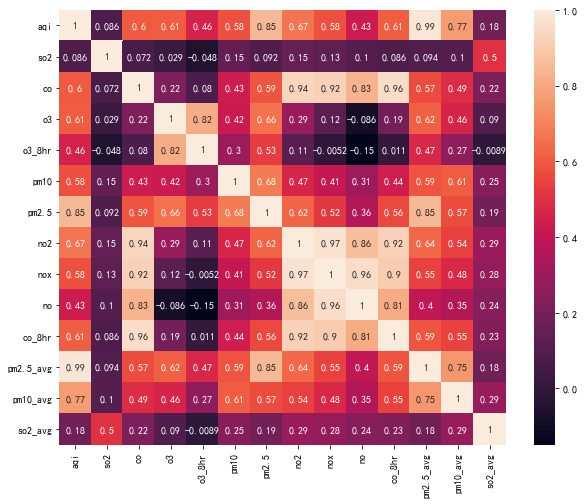

In [14]:
import seaborn as sns 
data_corr = data[['aqi', 'status', 'so2', 'co', 'o3', 'o3_8hr',
       'pm10', 'pm2.5', 'no2', 'nox', 'no', 'wind_speed', 'wind_direc',
       'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'
       ]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True)


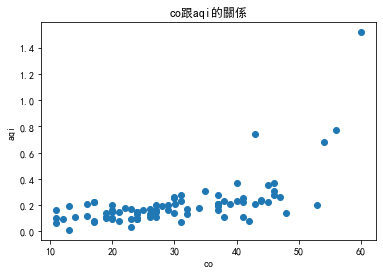

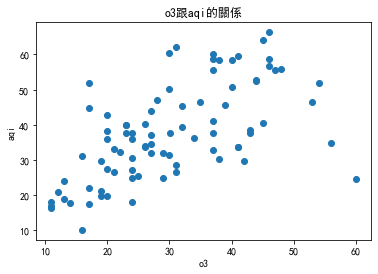

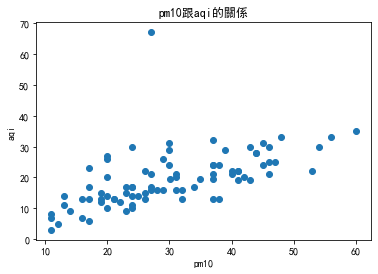

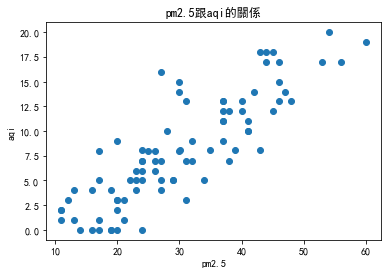

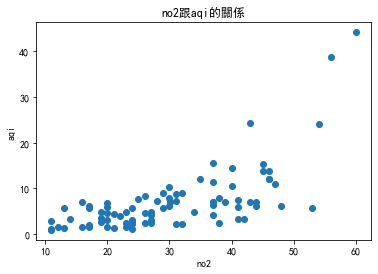

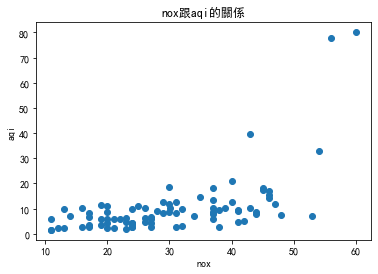

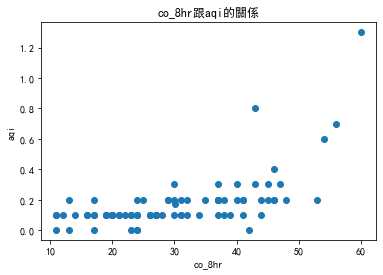

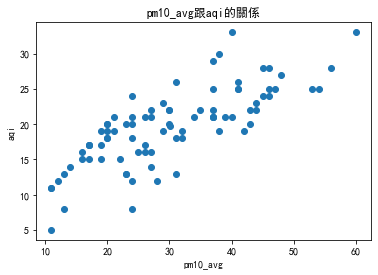

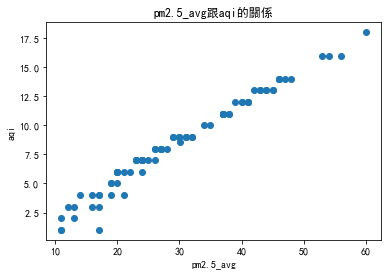

In [25]:
aqi = data['aqi']
targets = ['co','o3','pm10','pm2.5','no2','nox','co_8hr','pm10_avg','pm2.5_avg']

for target in targets :
    x = data[target]
    Title = target + '跟aqi的關係' 
    plt.title(Title)
    plt.xlabel(target)
    plt.ylabel('aqi')
    plt.scatter(aqi,x)
    plt.show()

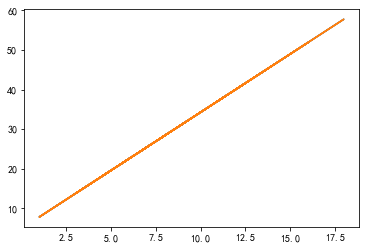

In [32]:
from sklearn.linear_model import LinearRegression
#使用線性規劃模型
model = LinearRegression()
pm_25_avg = pd.DataFrame(data['pm2.5_avg'])
aqi = pd.DataFrame(data['aqi'])
model.fit(pm_25_avg,aqi)
model_pred = model.predict(pm_25_avg)
plt.plot(pm_25_avg,model_pred)
plt.plot(pm_25_avg,model_pred)
plt.show()